In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

In [2]:
data = pd.read_csv("IPL IMB381IPL2013.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [3]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE','T-RUNS', 'T-WKTS',
'ODI-RUNS-S', 'ODI-SR-B','ODI-WKTS', 'ODI-SR-BL',
'CAPTAINCY EXP', 'RUNS-S','HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [4]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [5]:
encoded_data = pd.get_dummies(data[X_features], columns=categorical_features, drop_first=True)
encoded_data.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [6]:
X = encoded_data
Y = data['SOLD PRICE']

In [7]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)
Y = (Y - Y.mean())/ Y.std()

In [14]:
x_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [9]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

Text(0, 0.5, 'Features')

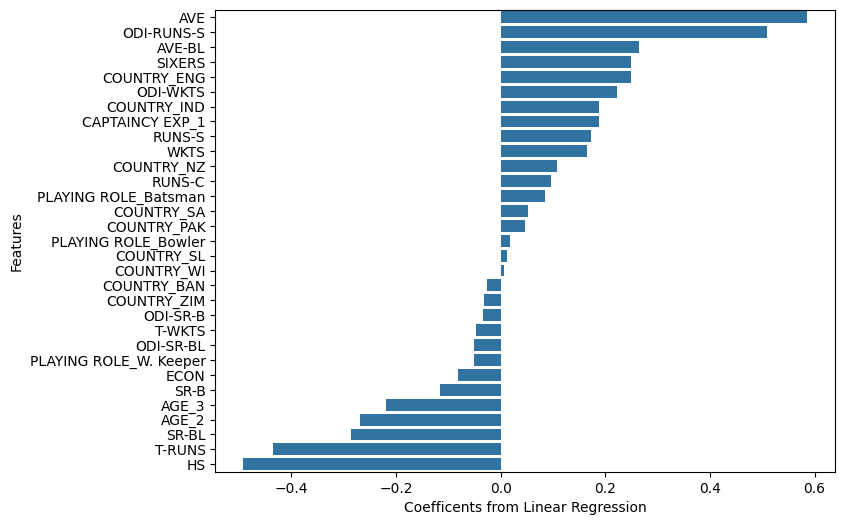

In [10]:
colums_coef = pd.DataFrame({"columns": encoded_data.columns, "coef": linreg.coef_})

sorted_coef_vals = colums_coef.sort_values("coef", ascending=False)

plt.figure(figsize=(8, 6))
sn.barplot(x="coef", y="columns", data=sorted_coef_vals)
plt.xlabel("Coefficents from Linear Regression")
plt.ylabel("Features")

In [11]:
def get_train_test_rmse(model):
  y_train_pred = model.predict(x_train)
  rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3)

  y_test_pred = model.predict(X_test)
  rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 3)

  print("train: ", rmse_train, "test: ", rmse_test)

get_train_test_rmse(linreg)

train:  0.679 test:  0.749


### **Ridge regression**

In [20]:
ridge = Ridge(alpha = 1, max_iter = 500)
ridge.fit(x_train, y_train)

get_train_test_rmse(ridge)

train:  0.68 test:  0.724


In [21]:
ridge = Ridge(alpha = 2.0, max_iter=1000)
ridge.fit(x_train, y_train)

get_train_test_rmse(ridge)

train:  0.682 test:  0.706


### **LASSO regression**

In [24]:
lasso = Lasso(alpha=0.01, max_iter=500)
lasso.fit(x_train, y_train)

get_train_test_rmse(lasso)

train:  0.688 test:  0.698


In [26]:
lasso_coef = pd.DataFrame({"columns": encoded_data.columns, "coef": lasso.coef_})
lasso_coef[lasso_coef.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


### **ELastic Net Regression**

In [28]:
enet = ElasticNet(alpha=1.01, l1_ratio=0.001, max_iter=500)
enet.fit(x_train, y_train)

get_train_test_rmse(enet)

train:  0.789 test:  0.665
